#### Source : https://www.kaggle.com/datasets/fuarresvij/gdp-growth-around-the-globe

# Let's import the libraries we need to explore and analyze this dataset.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statistics
import os

# 1. Let's import and visualize the file

In [3]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
data_gdp = pd.read_csv("/home/loick/Documents/Data analysis/GDP growth/Gdp-per-year.csv")
data_gdp.head(15)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,16.078431,18.648649,12.129841,3.961402,7.962872,5.882353,7.307692,8.203903,2.547144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,0.239594,7.980768,5.164334,4.579952,5.327717,3.912108,5.256810,4.023776,5.279927,...,0.923067,4.200209,3.984387,2.952845,2.217017,2.557135,2.485244,2.025941,-2.886856,4.303667
2,Afghanistan,8.832278,1.414118,11.229715,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,1.848752,3.770220,7.272440,5.396349,4.049793,-1.787079,-9.546464,1.465775,15.491888,...,5.142997,6.104192,5.927355,2.745894,0.127844,2.317679,2.952190,3.202544,-0.897014,3.914799
4,Angola,-4.400001,0.000000,4.200001,6.000002,3.499999,2.900002,4.082749,6.128890,0.041621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Albania,5.745635,2.948597,1.104938,-1.251597,1.780644,5.637243,-0.787843,-1.420040,9.836549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,4.649465,8.149743,7.788467,5.618790,0.542206,3.303787,2.838576,1.463000,0.041557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,15.745305,8.091571,-0.583815,10.983144,9.040587,3.390216,-8.303070,-6.214108,1.300640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,United Arab Emirates,16.526857,21.439330,-1.589603,20.923573,23.874775,4.659177,-6.719316,-4.745821,4.016951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Argentina,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,9.679526,...,-1.026420,2.405324,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.025934,-9.895269,10.263761


# 2. This dataset has a problem. As it is arranged above, we can't easily display it for a graph using the appropriate tools such as matplotlib.pyplot.

# We need to rearrange the data so that we have 3 columns : one for the year, one for the country and the last one for the values of GDP growth.

# Let's do it.

In [4]:
# Create the new dataframe with three columns: "Year," "Country," and "GDP"
transformed_data_gdp = pd.DataFrame(columns=['Year', 'Country', 'GDP'])

# Iterate through the rows of the original dataframe
for i, row in data_gdp.iterrows():
    # Extract the country name
    country = row['Country Name']
    
    # Iterate through the columns of the original dataframe, starting with the second column
    for j in range(1, len(data_gdp.columns)):
        # Extract the year and GDP value for this column
        year = data_gdp.columns[j]
        gdLetp = row[year]
        
        # Create a new row with the year, country, and GDP value
        new_row = pd.DataFrame({'Year': year, 'Country': country, 'GDP': gdp}, index=[0])
        
        # Append the new row to the transformed dataframe using pd.concat()
        transformed_data_gdp = pd.concat([transformed_data_gdp, new_row], ignore_index=True)

# Convert the "Year" column to a numeric data type
transformed_data_gdp['Year'] = pd.to_numeric(transformed_data_gdp['Year'])

transformed_data_gdp.head(10)

,Year,Country,GDP
0,1960,Aruba,16.078431
1,1961,Aruba,18.648649
2,1962,Aruba,12.129841
3,1963,Aruba,3.961402
4,1964,Aruba,7.962872
5,1965,Aruba,5.882353
6,1966,Aruba,7.307692
7,1967,Aruba,8.203903
8,1968,Aruba,2.547144
9,1969,Aruba,1.185788


# 3. Now we have the rearranged dataset. We can draw graphs of the evolution of the GDP growth. Theoretically, it is possible to display all the countries on the same graph, but it costs a lot of computational capacity and is not really interesting, as it could make the graph unreadable.

# Let's limit ourselves to a range of countries : France, Germany, Italy, Spain, and the UK.

In [109]:
countries_gdp = transformed_data_gdp.query('Country.isin(["France", "Germany","Italy","Spain","United Kingdom"])')
countries_gdp.head(330)

,Year,Country,GDP
3355,1960,Germany,3.1327
3356,1961,Germany,4.300341
3357,1962,Germany,4.777487
3358,1963,Germany,0.890069
3359,1964,Germany,-0.866739
...,...,...,...
7132,2016,Italy,1.667859
7133,2017,Italy,0.925811
7134,2018,Italy,0.500234
7135,2019,Italy,-9.025669


## Above is the dataset of our selected countries.

## Let's plot the corresponding graph

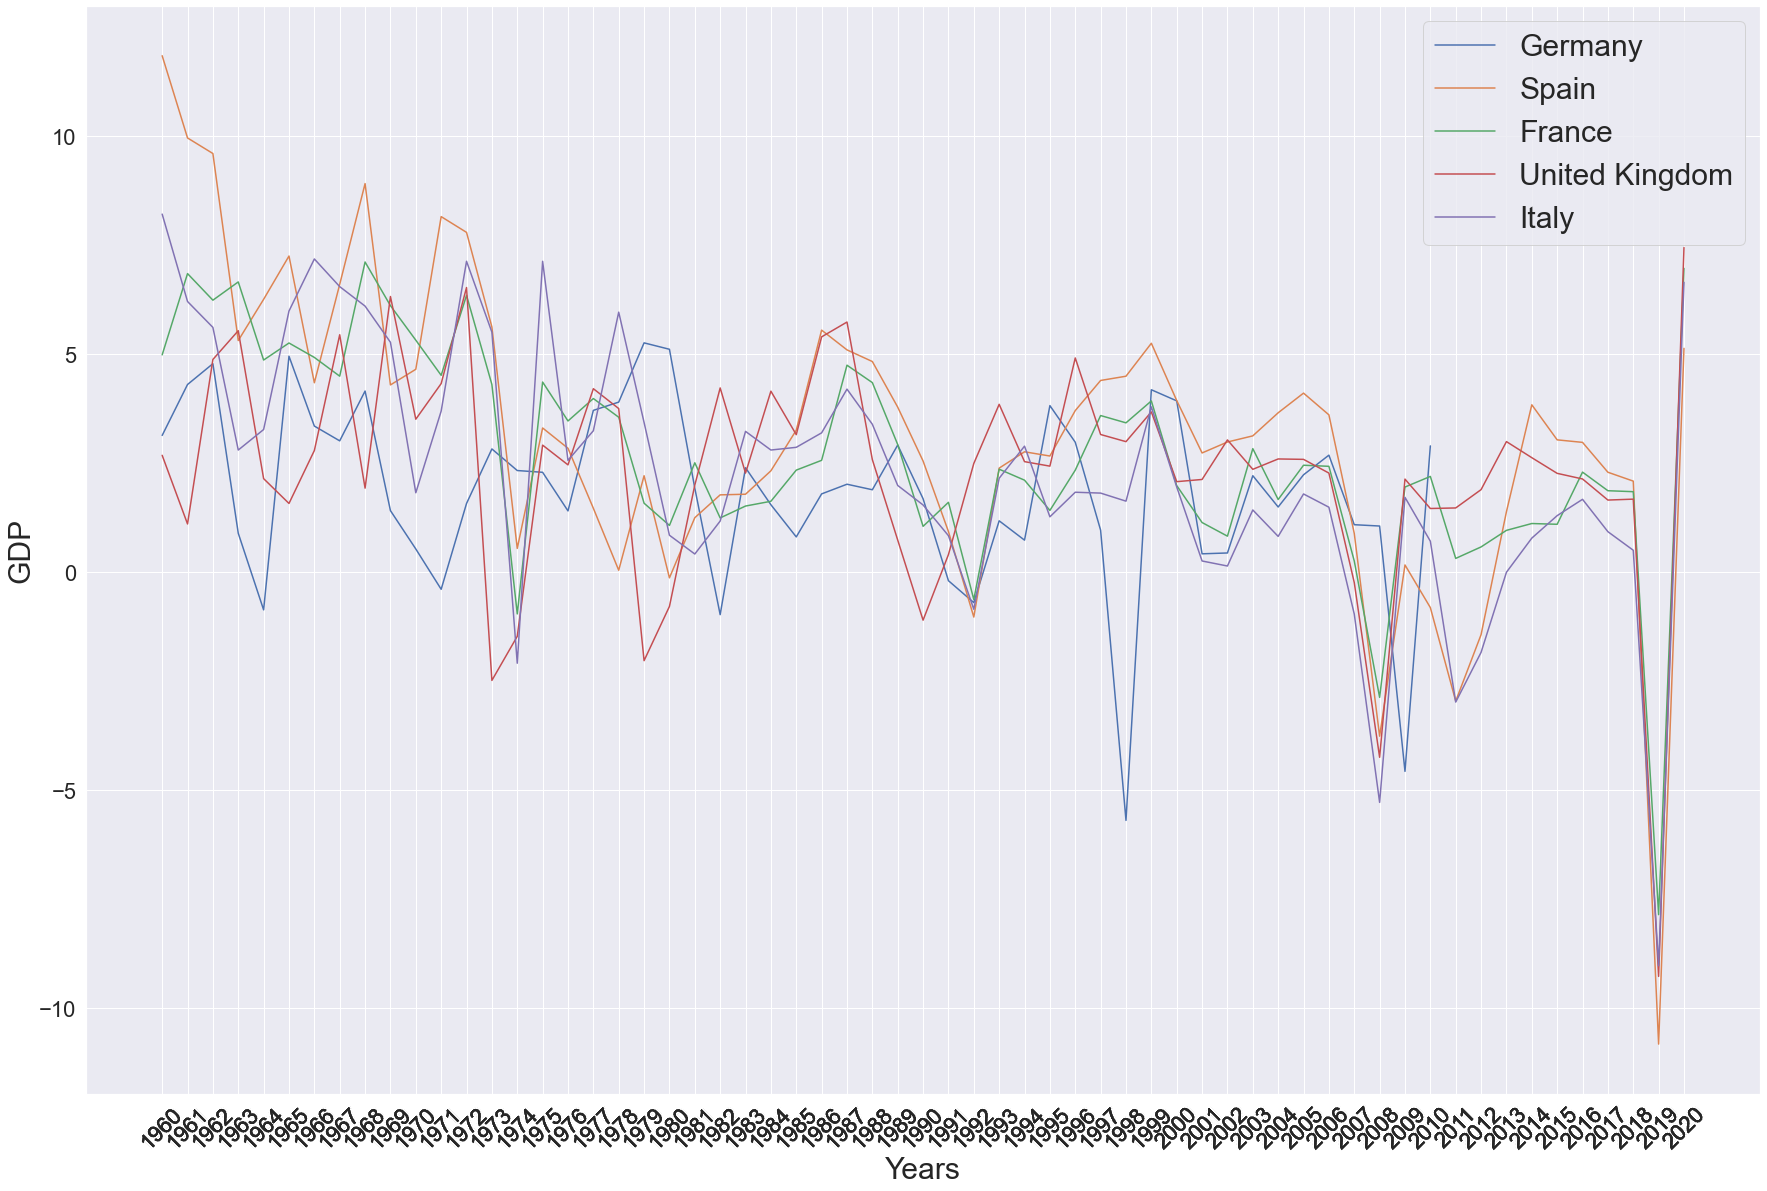

In [152]:
plt.figure(figsize=(30, 20))
sns.lineplot(x=x, y=y, hue='Country', data=countries_gdp)
plt.xticks(countries_gdp['Year'], rotation=45, fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Years', fontsize=30)
plt.ylabel('GDP', fontsize=30)
plt.legend(fontsize=30)

# 4. Analysis

## One of the main features of GDP growth is that it varies a lot over the years. Regulators and decision-makers would like to forecast the GDP growth for an upcoming year to present it as a proof of the success of their decision, as well as convince investors to spend money in their country due to bright economical perspectives.

## Is there a way we can forecast the GDP for the year 2021, for example, assuming we need this information for a very important international meeting ?

## Let's do it using a machine learning model based on linear regression. To reduce computational costs, we will use only one country as exemple. We chose France.

## Let's make a dataframe only for this country and display it.

In [160]:
# Select the rows of the dataframe that correspond to France
france_gdp = transformed_data_gdp.query('Country == "France"')
france_gdp

,Year,Country,GDP
4697,1960,France,4.980112
4698,1961,France,6.84347
4699,1962,France,6.23368
4700,1963,France,6.6521
4701,1964,France,4.861508
4702,1965,France,5.251837
4703,1966,France,4.921149
4704,1967,France,4.491309
4705,1968,France,7.109475
4706,1969,France,6.10868


# 5. Machine learning model

## We want to forecast the GDP growth. Using ML, we will go through 6 steps.

## 1. Collect data: The first step is to gather historical data on GDP growth and any other relevant economic indicators that you think may impact GDP growth. We need a sufficient amount of data to train the model.

## 2. Preprocess the data: Next, we need to preprocess the data by cleaning it, normalizing it, and potentially transforming it in some way to make it more suitable for machine learning.

## 3. Split the data: We need to split the data into training and test sets. The training set will be used to train the model, while the test set will be used to evaluate the model's performance.

## 4. Train the model: we need to select a machine learning algorithm and train it on the training data. This will involve adjusting the hyperparameters of the model to optimize its performance.

## 5. Evaluate the model: Once the model is trained, we can use the test data to evaluate its performance. We use metrics such as mean squared error or mean absolute error to measure the model's accuracy.

## 6. Make predictions: Finally, we use the trained model to make predictions about GDP growth for future years. We input the relevant economic indicators and the model will output a prediction for GDP growth.

# The first step has been done : collecting the GDP growth from 1960 to 2020.

# The 2nd step as well : our data is clean, doesn't contain null values, and is ready to be split.

## Let's do this 3rd step now.

In [166]:
from sklearn.model_selection import train_test_split

# Extract the input data (year) and target values (gdp_growth)
X = france_gdp['Year']
y = france_gdp['GDP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Our 3rd step has been successfully implemented : our data set is now split into 2 subdatadets : training and testing.

## Now, let's move on to the 4th step : train the model (linear regression)

### We use below some techniques to arrange our arrays so that it is accepted by the LinearRegression() method of the sklearn class.

### Thus, we rearrange : X_train and y_train

In [173]:
X_train = X.to_numpy()
X_train

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020])

In [175]:
X_train = X_train.reshape(-1, 1)
X_train

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020]])

In [179]:
y_train = y.to_numpy()
y_train

array([4.9801118491384, 6.84346998523586, 6.23367995209179,
       6.65209950760072, 4.86150769580638, 5.25183704566086,
       4.92114891528463, 4.49130888579006, 7.10947534485236,
       6.10867981285152, 5.31671589688149, 4.51137401861739,
       6.34458067469789, 4.30091914308284, -0.959884746223096,
       4.35675890276836, 3.46431200428788, 3.97854372235838,
       3.54998915669242, 1.57874525990584, 1.06901983853727,
       2.50539661637579, 1.24086486211559, 1.51372160344316,
       1.62278136715794, 2.33727634979969, 2.56190033450119,
       4.74314219356484, 4.34386106267613, 2.92393508123074,
       1.04817584704435, 1.59934267687127, -0.628666351905437,
       2.35834218111899, 2.10669525325974, 1.41299367250002,
       2.33629652937944, 3.58865942535427, 3.42137379882455,
       3.92366922704063, 1.98372141863292, 1.13553148214601,
       0.823160756684118, 2.82975292869891, 1.66321998030079,
       2.44932360111885, 2.42473624337305, 0.254945960124005,
       -2.873313828

In [180]:
y_train = y_train.reshape(-1, 1)
y_train

array([[4.9801118491384],
       [6.84346998523586],
       [6.23367995209179],
       [6.65209950760072],
       [4.86150769580638],
       [5.25183704566086],
       [4.92114891528463],
       [4.49130888579006],
       [7.10947534485236],
       [6.10867981285152],
       [5.31671589688149],
       [4.51137401861739],
       [6.34458067469789],
       [4.30091914308284],
       [-0.959884746223096],
       [4.35675890276836],
       [3.46431200428788],
       [3.97854372235838],
       [3.54998915669242],
       [1.57874525990584],
       [1.06901983853727],
       [2.50539661637579],
       [1.24086486211559],
       [1.51372160344316],
       [1.62278136715794],
       [2.33727634979969],
       [2.56190033450119],
       [4.74314219356484],
       [4.34386106267613],
       [2.92393508123074],
       [1.04817584704435],
       [1.59934267687127],
       [-0.628666351905437],
       [2.35834218111899],
       [2.10669525325974],
       [1.41299367250002],
       [2.33629652937944]

In [181]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

## We have successfully created an instance of regression and trained it on the training data set. 

## We can now go into the 5th step, i.e train the model. 

## It consists of using the train dataset that we created to make predictions regarding the GDP growth values for the years it is known, and compare them with the actual values we have on hand. The less the gap between both, the better the accuracy of the model.

### We need to rearrange the data again, for the same reasons as we did above.

In [186]:
X_test = X_test.to_numpy()
X_test

array([1960, 1965, 2006, 1991, 1973, 2015, 1994, 2009, 1972, 2000, 1993,
       2019, 1976])

In [187]:
X_test = X_test.reshape(-1, 1)
X_test

array([[1960],
       [1965],
       [2006],
       [1991],
       [1973],
       [2015],
       [1994],
       [2009],
       [1972],
       [2000],
       [1993],
       [2019],
       [1976]])

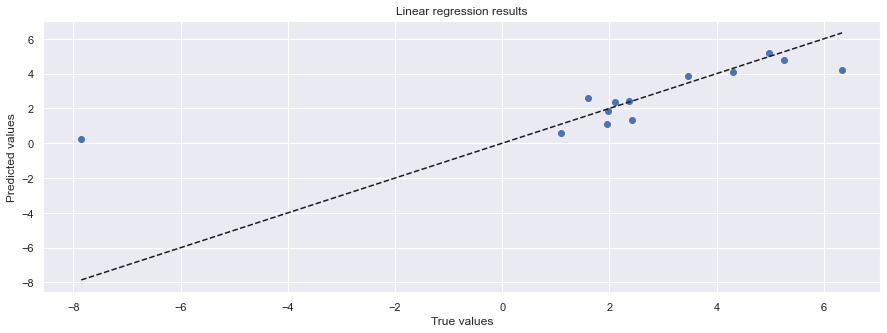

In [195]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a scatter plot of the predicted vs. true values
plt.figure(figsize=(15, 5))

# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a scatter plot of the predicted vs. true values
plt.scatter(y_test, y_pred)

# Add a diagonal line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Linear regression results')
plt.show()

## Graphically speaking, our model provides a good accuracy, because most of the dots on the scatterplot are close to the linear regression line.

## Let's calculate three metrics to quantify how much our model is accurate :

## 1) The Mean Squared Error (MSE) is a measure of the average squared difference between the predicted values and the true values. A lower MSE indicates that the model is performing better.

## 2) The Root Mean Squared Error (RMSE) is the square root of the MSE and is often used as a more interpretable measure of model performance.

## 3) The R² is a measure of how well the model explains the variance in the target value. It ranges from 0 to 1, with higher values indicating a better fit.

In [206]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate the RMSE
rmse = np.sqrt(mse)

# Calculate the R²
r2 = r2_score(y_test, y_pred)

print('The MSE is :',mse,'\n','The RMSE is :',rmse,'\n','The r2 is :',r2)

The MSE is : 5.687228539964536 
 The RMSE is : 2.3847910893754483 
 The r2 is : 0.48284811260988847


## If we take the R² as a reference for the quality of the model, it goes only up to 48%. It means that only 48% of the variation of the GDP is explained by the model.

## What can explain it ?

## The data may not be linearly related. From our graph below, we can easily state that indeed, our data doesn't fit a linear curve. 

## There may be a lot of noise in the data: If the data contains a lot of random noise or variability, it may be difficult for the model to accurately predict the GDP, leading to a low R-squared value. 
## It is, as well, easy to guess that a lot of variables impact the GDP : we can think of the internal and external investments, the policy cycle inferred by the elections, unforeseeable external shocks and so on.

## Let's implement the final step of this analysis. 

## It consist of making predictions about future GDP growth using the trained model

In [216]:
X_new = [[2021],
         [2022],
         [2023],
         [2024],
         [2025]]

predictions = model.predict(X_new)

predictions

array([[ 0.07639257],
       [-0.007827  ],
       [-0.09204658],
       [-0.17626616],
       [-0.26048573]])

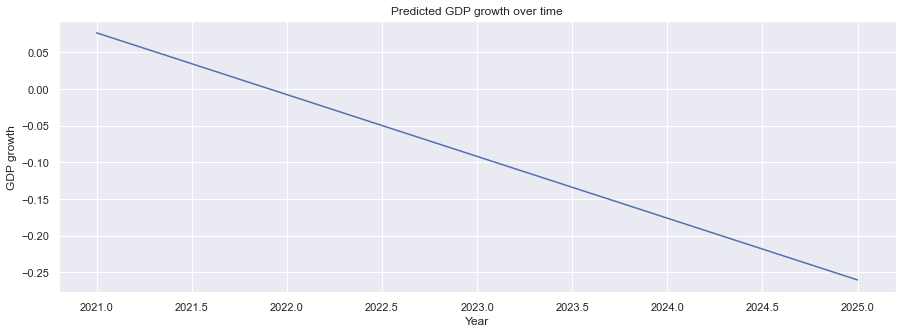

In [214]:
# Make predictions on new data
predictions = model.predict(X_new)

# Plot the predicted values over time
plt.figure(figsize=(15, 5))
plt.plot(X_new, predictions)
plt.xlabel('Year')
plt.ylabel('GDP growth')
plt.title('Predicted GDP growth over time')

plt.show()

# Conclusion of the analysis

## We have, on the graph above, the predicted values of GDP growth according to our linear regression model. We can see that according to it, the GDP growth is going to be only negative over the next five years, which actually means that France will be likely to enter a recession phase.

## Decision-makers can take these predictions as a warning to look deeper into the ways to fix the structural problems of the french economy that got seriously impacted due to several lockdowns during the Covid pandemic.